<a href="https://colab.research.google.com/github/elhamng/MLinChemistry/blob/master/TestMMFF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install RDKit. Takes 2-3 minutes
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge python=3.7
!time conda install -q -y -c conda-forge rdkit


--2020-10-21 09:39:08--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-10-21 09:39:09--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93052469 (89M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  88.74M   236MB/s    in 0.4s    

2020-10-21 09:39:09 (236 MB/s) - ‘Miniconda3-latest-Linux

In [3]:

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import numpy as np

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
df = pd.read_csv('/content/drive/My Drive/AMD-Project/First-project/reddb_test_group_26.csv')

In [7]:
df.head()

,smiles,moleculerWeight,stoichiometry,stoichiometry.1,gasEnergy,solutionEnergy,gasHomo,solutionHomo,gasLumo,solutionLumo,mepcDipoleMomentsTot,mepcGasDipoleMomentsTot,mmcDipoleMomentsTot,mmcGasDipoleMomentsTot,mqmwDipoleMomentsTot,mqmwGasDipoleMomentsTot,alpha,beta,dalpha,cavityEnergy,molecularSurface,reactionFieldEnergy,solventAccessSurface,molecularPointGroup,nuclearRepulsionEnergy,pointGroupUsed
0,O=C1OC(=O)C=C1,98.00,C4H2O3,NaN,-378.89918,-378.90921,-0.26305,-0.27345,-0.16095,-0.15824,5.6636,4.1934,6.5309,4.8997,5.7220,4.2348,54.743,31.140355,47.976,3.83641,107.77013,-13.72340,242.77736,C2v,272.515501,C2v
1,O=C1OC(=O)C(=C1)O,114.00,C4H2O4,OH,-454.06562,-454.07870,-0.26939,-0.26334,-0.14906,-0.14790,4.8360,3.4922,5.3261,3.9971,4.8799,3.5239,61.887,-123.638395,45.468,3.90021,112.71120,-16.66028,250.55044,C1,351.367559,C1
2,O=C1OC(=O)C(F)=C1F,133.98,C4O3F2,F,-577.19143,-577.19630,-0.28622,-0.28677,-0.16921,-0.16499,2.7967,2.0391,1.0997,0.3263,2.8356,2.0698,58.411,-153.586284,51.959,4.03023,121.76391,-10.19075,266.39426,C2v,434.353303,C2v
3,O=C1OC(=O)C(C(=O)O)=C1C(=O)O,185.98,C6H2O7,COOH,-755.67777,-755.69768,-0.27063,-0.27702,-0.21387,-0.20152,5.1939,3.3327,4.9663,3.2474,5.1945,3.3201,96.435,142.431481,35.721,4.38522,153.05979,-25.24181,309.64934,C1,789.447978,C1
4,O=C1OC(=O)C(N)=C1N,128.02,C4N2H4O3,NH2,-489.52053,-489.54624,-0.18974,-0.18290,-0.11376,-0.12295,9.7072,6.9753,11.3046,8.4212,9.7599,7.0068,84.474,-442.812317,73.732,4.08638,127.51153,-27.07350,273.23612,C2v,438.854193,C2v


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   smiles                   22 non-null     object 
 1   moleculerWeight          22 non-null     float64
 2   stoichiometry            22 non-null     object 
 3   stoichiometry.1          20 non-null     object 
 4   gasEnergy                22 non-null     float64
 5   solutionEnergy           22 non-null     float64
 6   gasHomo                  22 non-null     float64
 7   solutionHomo             22 non-null     float64
 8   gasLumo                  22 non-null     float64
 9   solutionLumo             22 non-null     float64
 10  mepcDipoleMomentsTot     22 non-null     float64
 11  mepcGasDipoleMomentsTot  22 non-null     float64
 12  mmcDipoleMomentsTot      22 non-null     float64
 13  mmcGasDipoleMomentsTot   22 non-null     float64
 14  mqmwDipoleMomentsTot     22 

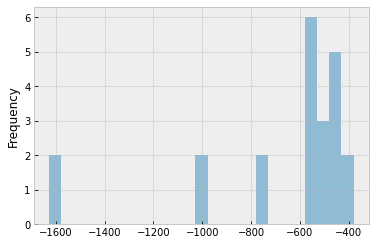

In [9]:
plt.style.use('bmh')
df['solutionEnergy'].plot.hist(alpha=0.5,bins=25)

In [10]:
df['mol'] = df['smiles'].apply(lambda x: Chem.MolFromSmiles(x))

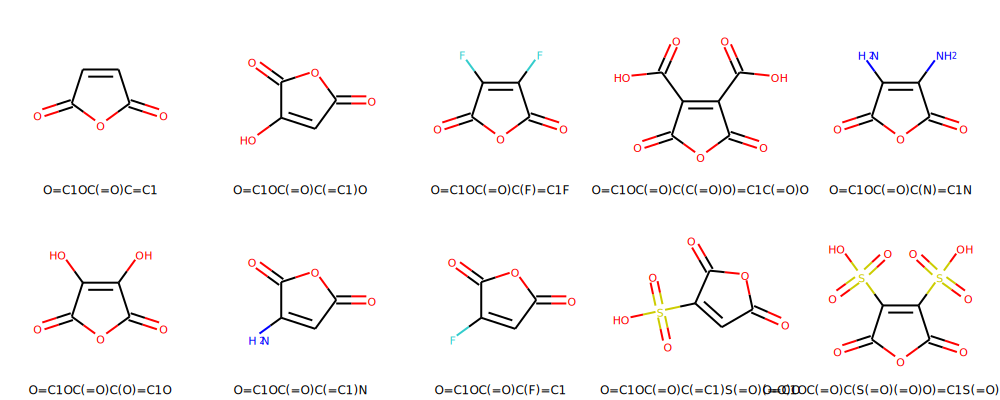

In [11]:
mols = df['mol'][:10]
Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(df['smiles'][:10].values))

In [12]:
df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))

In [13]:
df.head()

,smiles,moleculerWeight,stoichiometry,stoichiometry.1,gasEnergy,solutionEnergy,gasHomo,solutionHomo,gasLumo,solutionLumo,mepcDipoleMomentsTot,mepcGasDipoleMomentsTot,mmcDipoleMomentsTot,mmcGasDipoleMomentsTot,mqmwDipoleMomentsTot,mqmwGasDipoleMomentsTot,alpha,beta,dalpha,cavityEnergy,molecularSurface,reactionFieldEnergy,solventAccessSurface,molecularPointGroup,nuclearRepulsionEnergy,pointGroupUsed,mol
0,O=C1OC(=O)C=C1,98.00,C4H2O3,NaN,-378.89918,-378.90921,-0.26305,-0.27345,-0.16095,-0.15824,5.6636,4.1934,6.5309,4.8997,5.7220,4.2348,54.743,31.140355,47.976,3.83641,107.77013,-13.72340,242.77736,C2v,272.515501,C2v,<rdkit.Chem.rdchem.Mol object at 0x7fcdd75fe940>
1,O=C1OC(=O)C(=C1)O,114.00,C4H2O4,OH,-454.06562,-454.07870,-0.26939,-0.26334,-0.14906,-0.14790,4.8360,3.4922,5.3261,3.9971,4.8799,3.5239,61.887,-123.638395,45.468,3.90021,112.71120,-16.66028,250.55044,C1,351.367559,C1,<rdkit.Chem.rdchem.Mol object at 0x7fcdd75fe990>
2,O=C1OC(=O)C(F)=C1F,133.98,C4O3F2,F,-577.19143,-577.19630,-0.28622,-0.28677,-0.16921,-0.16499,2.7967,2.0391,1.0997,0.3263,2.8356,2.0698,58.411,-153.586284,51.959,4.03023,121.76391,-10.19075,266.39426,C2v,434.353303,C2v,<rdkit.Chem.rdchem.Mol object at 0x7fcdd75fe9e0>
3,O=C1OC(=O)C(C(=O)O)=C1C(=O)O,185.98,C6H2O7,COOH,-755.67777,-755.69768,-0.27063,-0.27702,-0.21387,-0.20152,5.1939,3.3327,4.9663,3.2474,5.1945,3.3201,96.435,142.431481,35.721,4.38522,153.05979,-25.24181,309.64934,C1,789.447978,C1,<rdkit.Chem.rdchem.Mol object at 0x7fcdd75fea30>
4,O=C1OC(=O)C(N)=C1N,128.02,C4N2H4O3,NH2,-489.52053,-489.54624,-0.18974,-0.18290,-0.11376,-0.12295,9.7072,6.9753,11.3046,8.4212,9.7599,7.0068,84.474,-442.812317,73.732,4.08638,127.51153,-27.07350,273.23612,C2v,438.854193,C2v,<rdkit.Chem.rdchem.Mol object at 0x7fcdd75fea80>


In [14]:
df_n = df.loc[:, ['gasEnergy', 'solutionEnergy', 'mol']]

In [15]:
df_n.head()

,gasEnergy,solutionEnergy,mol
0,-378.89918,-378.90921,<rdkit.Chem.rdchem.Mol object at 0x7fcdd75fe940>
1,-454.06562,-454.07870,<rdkit.Chem.rdchem.Mol object at 0x7fcdd75fe990>
2,-577.19143,-577.19630,<rdkit.Chem.rdchem.Mol object at 0x7fcdd75fe9e0>
3,-755.67777,-755.69768,<rdkit.Chem.rdchem.Mol object at 0x7fcdd75fea30>
4,-489.52053,-489.54624,<rdkit.Chem.rdchem.Mol object at 0x7fcdd75fea80>


In [16]:

def force_field_energy(mol,gen_3d=True, nconf=100):
  #cids = AllChem.EmbedMolecule(mol)
  #AllChem.MMFFOptimizeMolecule(mol)
  #pyMP = AllChem.MMFFGetMoleculeProperties(mol)
  #pyFF = AllChem.MMFFGetMoleculeForceField(mol, pyMP)
  #pyFF.Minimize()
  #energy = pyFF.CalcEnergy()
  #return energy*23.061
  if gen_3d:
        cids = AllChem.EmbedMultipleConfs(mol, nconf, AllChem.ETKDG())

        AllChem.MMFFSanitizeMolecule(mol)
        mmff_props = AllChem.MMFFGetMoleculeProperties(mol,mmffVariant='MMFF94s')

        energies = []
        for cid in cids:
            ff = AllChem.MMFFGetMoleculeForceField(mol, mmff_props, confId=cid)
            ff.Minimize()
            energy = ff.CalcEnergy()
            energies.append(energy)

        energies = np.asarray(energies)
        min_energy_idx = np.argsort(energies)[0]
  return min_energy_idx*23.06

In [17]:
df['energy_mmff'] = df['mol'].apply(lambda x: force_field_energy(x))

In [18]:
df.head()

,smiles,moleculerWeight,stoichiometry,stoichiometry.1,gasEnergy,solutionEnergy,gasHomo,solutionHomo,gasLumo,solutionLumo,mepcDipoleMomentsTot,mepcGasDipoleMomentsTot,mmcDipoleMomentsTot,mmcGasDipoleMomentsTot,mqmwDipoleMomentsTot,mqmwGasDipoleMomentsTot,alpha,beta,dalpha,cavityEnergy,molecularSurface,reactionFieldEnergy,solventAccessSurface,molecularPointGroup,nuclearRepulsionEnergy,pointGroupUsed,mol,energy_mmff
0,O=C1OC(=O)C=C1,98.00,C4H2O3,NaN,-378.89918,-378.90921,-0.26305,-0.27345,-0.16095,-0.15824,5.6636,4.1934,6.5309,4.8997,5.7220,4.2348,54.743,31.140355,47.976,3.83641,107.77013,-13.72340,242.77736,C2v,272.515501,C2v,<rdkit.Chem.rdchem.Mol object at 0x7fcdd75fe940>,1890.92
1,O=C1OC(=O)C(=C1)O,114.00,C4H2O4,OH,-454.06562,-454.07870,-0.26939,-0.26334,-0.14906,-0.14790,4.8360,3.4922,5.3261,3.9971,4.8799,3.5239,61.887,-123.638395,45.468,3.90021,112.71120,-16.66028,250.55044,C1,351.367559,C1,<rdkit.Chem.rdchem.Mol object at 0x7fcdd75fe990>,1106.88
2,O=C1OC(=O)C(F)=C1F,133.98,C4O3F2,F,-577.19143,-577.19630,-0.28622,-0.28677,-0.16921,-0.16499,2.7967,2.0391,1.0997,0.3263,2.8356,2.0698,58.411,-153.586284,51.959,4.03023,121.76391,-10.19075,266.39426,C2v,434.353303,C2v,<rdkit.Chem.rdchem.Mol object at 0x7fcdd75fe9e0>,1821.74
3,O=C1OC(=O)C(C(=O)O)=C1C(=O)O,185.98,C6H2O7,COOH,-755.67777,-755.69768,-0.27063,-0.27702,-0.21387,-0.20152,5.1939,3.3327,4.9663,3.2474,5.1945,3.3201,96.435,142.431481,35.721,4.38522,153.05979,-25.24181,309.64934,C1,789.447978,C1,<rdkit.Chem.rdchem.Mol object at 0x7fcdd75fea30>,1083.82
4,O=C1OC(=O)C(N)=C1N,128.02,C4N2H4O3,NH2,-489.52053,-489.54624,-0.18974,-0.18290,-0.11376,-0.12295,9.7072,6.9753,11.3046,8.4212,9.7599,7.0068,84.474,-442.812317,73.732,4.08638,127.51153,-27.07350,273.23612,C2v,438.854193,C2v,<rdkit.Chem.rdchem.Mol object at 0x7fcdd75fea80>,1637.26


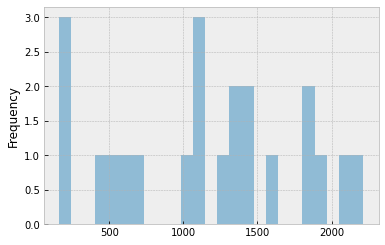

In [19]:
plt.style.use('bmh')
df['energy_mmff'].plot.hist(alpha=0.5,bins=25)

In [20]:
def smiles_to_rdkit(smi, gen_3d=True, nconf=100):
    """
    Convert smiles to RDKit molecule.
    Tries to generate the lowest-energy conformer.
    """
    mol = Chem.MolFromSmiles(smi)
    mol = Chem.AddHs(mol)

    if gen_3d:
        cids = AllChem.EmbedMultipleConfs(mol, nconf, AllChem.ETKDG())

        AllChem.MMFFSanitizeMolecule(mol)
        mmff_props = AllChem.MMFFGetMoleculeProperties(mol)

        energies = []
        for cid in cids:
            ff = AllChem.MMFFGetMoleculeForceField(mol, mmff_props, confId=cid)
            ff.Minimize()
            energy = ff.CalcEnergy()
            energies.append(energy)

        energies = np.asarray(energies)
        min_energy_idx = np.argsort(energies)[0]

        new_mol = Chem.Mol(mol)
        new_mol.RemoveAllConformers()
        min_conf = mol.GetConformer(cids[min_energy_idx])
        new_mol.AddConformer(min_conf, assignId=True)
        mol = new_mol

    return mol

In [21]:
mol = df_n['mol'][4]
AllChem.EmbedMolecule(mol)
AllChem.MMFFOptimizeMolecule(mol)
print(mol)
#for x in mol:
pyMP = AllChem.MMFFGetMoleculeProperties(mol, mmffVariant='MMFF94s')
print(pyMP)
pyFF = AllChem.MMFFGetMoleculeForceField(mol, pyMP)

In [22]:

print(pyFF.CalcEnergy()*23.06)
#grad = pyFF.CalcGradient()   # This is not a defined method.


1647.8159115797496


In [23]:
for atom in mol.GetAtoms():
      if not atom.GetAtomicNum() == 1:
           idx = atom.GetIdx()
           pyFF.MMFFAddPositionConstraint(idx, maxDispl=0.5, forceConstant=100)
pyFF.Minimize(maxIts=10000)
pyFF.CalcEnergy()*23.06
# this gives the energy after applying a moderate restraint (100 kcal/mol, with a maximum displacement of 0.5 A).

1513.972947137952

In [27]:
m = Chem.MolFromSmiles('C1CCC1OC')
m2=Chem.AddHs(m)
AllChem.EmbedMolecule(m2)
#AllChem.EmbedMultipleConfs(m2)
AllChem.MMFFOptimizeMolecule(m2)
pyMP = AllChem.MMFFGetMoleculeProperties(m2)
pyFF = AllChem.MMFFGetMoleculeForceField(m2, pyMP)
print(pyFF.CalcEnergy()*23.06)
pyMP.GetMMFFVdWParams(0,1)

247.40683313756654


(3.9377389919289634,
 0.06779699304291371,
 3.9377389919289634,
 0.06779699304291371)

In [26]:
atorvastatin_smiles = 'O=C(O)C[C@H](O)C[C@H](O)CCn2c(c(c(c2c1ccc(F)cc1)c3ccccc3)C(=O)Nc4ccccc4)C(C)C'
atorvastatin = Chem.MolFromSmiles(atorvastatin_smiles) # Atorvastatin (aka Lipitor) is one of the world's best-selling drugs.

fingerprint = GetMorganFingerprintAsBitVect(atorvastatin, radius=2, nBits=2048)

fp_array = np.zeros((1, ))
ConvertToNumpyArray(fingerprint, fp_array)

print(fp_array)
# [0. 1. 0. ... 0. 0. 0.]

print(fp_array.shape)
# (2048,)

[0. 1. 0. ... 0. 0. 0.]
(2048,)


In [ ]:
def smiles_to_rdkit(smi, gen_3d=True, nconf=100):
    """
    Convert smiles to RDKit molecule.
    Tries to generate the lowest-energy conformer.
    """
    mol = Chem.MolFromSmiles(smi)
    mol = Chem.AddHs(mol)

    if gen_3d:
        cids = AllChem.EmbedMultipleConfs(mol, nconf, AllChem.ETKDG())

        AllChem.MMFFSanitizeMolecule(mol)
        mmff_props = AllChem.MMFFGetMoleculeProperties(mol)

        energies = []
        for cid in cids:
            ff = AllChem.MMFFGetMoleculeForceField(mol, mmff_props, confId=cid)
            ff.Minimize()
            energy = ff.CalcEnergy()
            energies.append(energy)

        energies = np.asarray(energies)
        min_energy_idx = np.argsort(energies)[0]

        new_mol = Chem.Mol(mol)
        new_mol.RemoveAllConformers()
        min_conf = mol.GetConformer(cids[min_energy_idx])
        new_mol.AddConformer(min_conf, assignId=True)
        mol = new_mol

    return mol